In [1]:
import sys
import os
import yaml
import numpy as np
#import pandas
from io import StringIO
import pandas as pd
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

In [2]:
# load setup information
with open('../../etc/SSM_config_whidbey.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
# rename existing and reference tags to match Su Kyong's labels
ssm['run_information']['run_tag']['whidbey']['wqm_baseline'] = "exist"
ssm['run_information']['run_tag']['whidbey']['wqm_reference'] = "ref"

In [6]:
whidbey_df = pd.read_excel(
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets/whidbey_wc_noncompliant_m0p25.xlsx',
    sheet_name='Volume_Days',
    index_col="Unnamed: 0"
)
whidbey_local={}
whidbey_global={}
for run in [*whidbey_df]:
    whidbey_local[run] = whidbey_df[run]["Whidbey"]/whidbey_df['2014 Conditions']["Whidbey"]
    whidbey_global[run] = whidbey_df[run]["ALL_REGIONS"]/whidbey_df['2014 Conditions']["ALL_REGIONS"]

In [12]:
sog_df = pd.read_excel(
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/SOG_NB/spreadsheets/SOG_NB_wc_noncompliant_m0p25.xlsx',
    sheet_name='Volume_Days',
    index_col="Unnamed: 0"
)

sog_local={}
sog_global={}
for run in [*sog_df]:
    sog_local[run] = sog_df[run]["Whidbey"]/sog_df['Present Day']["Whidbey"]
    sog_global[run] = sog_df[run]["ALL_REGIONS"]/sog_df['Present Day']["ALL_REGIONS"]

In [37]:
# SOG
sog_local_vals=[sog_local[val] for val in [*sog_local]]
sog_global_vals=[sog_global[val] for val in [*sog_global]]

# Whidbey
whidbey_local_vals=[whidbey_local[val] for val in [*whidbey_local]]
whidbey_global_vals=[whidbey_global[val] for val in [*whidbey_global]]

In [92]:
colors = ['darkolivegreen','olive','darkkhaki','khaki','thistle','palevioletred','darkorchid',
                'darkmagenta','darkslateblue','midnightblue', 'teal','darkturquoise']
len(colors)

12

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


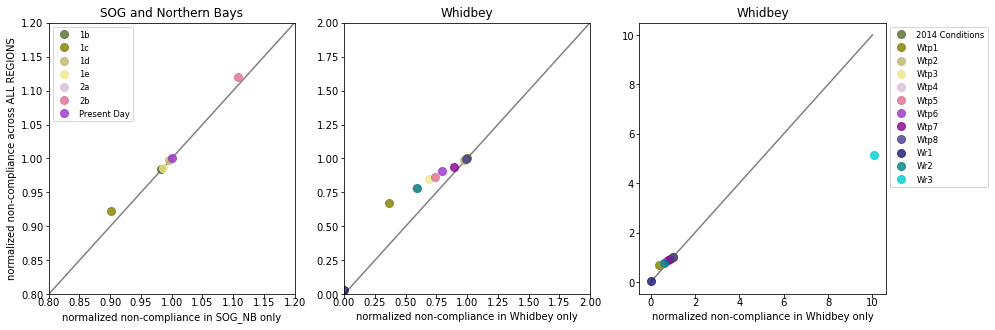

In [98]:
fig,ax=plt.subplots(1,3,figsize=(15, 5))
ax[0].plot(np.arange(0,3),np.arange(0,3),color='grey')
[ax[0].plot(sog_local_vals[idx],sog_global_vals[idx],'.', markersize=16,alpha=0.8,color=colors[idx],label=[*sog_local][idx]) for idx,val in enumerate(sog_local_vals)]
ax[0].legend(bbox_to_anchor=(0,1), loc="upper left")
ax[0].set_xlim(0.8,1.2)
ax[0].set_ylim(0.8,1.2)
ax[0].set_title('SOG and Northern Bays')
ax[1].plot(np.arange(0,11),np.arange(0,11),color='grey')
[ax[1].plot(whidbey_local_vals[idx],whidbey_global_vals[idx],'.',markersize=16,alpha=0.8,color=colors[idx],label=[*whidbey_local][idx]) for idx,val in enumerate(whidbey_local_vals)]
ax[1].set_xlim(0,2)
ax[1].set_ylim(0,2)
ax[1].set_title('Whidbey')
#ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[2].plot(np.arange(0,11),np.arange(0,11),color='grey')
[ax[2].plot(whidbey_local_vals[idx],whidbey_global_vals[idx],'.',markersize=16,alpha=0.8,color=colors[idx],label=[*whidbey_local][idx]) for idx,val in enumerate(whidbey_local_vals)]
ax[2].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[2].set_title('Whidbey')
ax[0].set_ylabel('normalized non-compliance across ALL REGIONS')
ax[0].set_xlabel('normalized non-compliance in SOG_NB only')
ax[1].set_xlabel('normalized non-compliance in Whidbey only')
ax[2].set_xlabel('normalized non-compliance in Whidbey only')
plt.savefig(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/line_fits/local_vs_nonlocal_noncompliance.png', bbox_inches='tight', format='png', dpi=1000)


In [56]:
len([*whidbey_local])

12

In [49]:
mpl.colormaps('tab20c')

TypeError: ColormapRegistry.__call__() takes 1 positional argument but 2 were given

In [57]:
from matplotlib import cm
cmap = cm.get_cmap('tab20c',12)

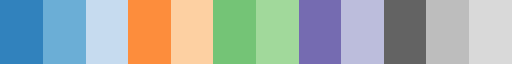

In [58]:
cmap